In [2]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import*

from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType

In [3]:
# 2. Initializing SparkSession

spark = SparkSession.builder.appName("loadbranch").getOrCreate()

In [4]:
# Read the data from the database

sp_credVisual = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "cdw_sapp_credit_card") \
  .option("user", "root") \
  .option("password", "password") \
  .load()

sp_credVisual.show(1)

+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|BRANCH_CODE|      CUST_CC_NO| CUST_SSN|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|  TIMEID|
+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|        156|4210653312478046|123455692|         22562|         Grocery|            91.08|20180813|
+-----------+----------------+---------+--------------+----------------+-----------------+--------+
only showing top 1 row



In [5]:
# Convert Spark dataframe to Pandas Dataframe

pd_credVisual = sp_credVisual.toPandas()

# Display last 5 rows in pandas dataframe
pd_credVisual.tail()

,BRANCH_CODE,CUST_CC_NO,CUST_SSN,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,TIMEID
93383,131,4210653312478046,123455692,22557,Grocery,65.70,20180602
93384,158,4210653312478046,123455692,22558,Bills,79.59,20180216
93385,20,4210653312478046,123455692,22559,Healthcare,76.24,20180615
93386,80,4210653312478046,123455692,22560,Education,81.56,20181217
93387,91,4210653312478046,123455692,22561,Test,81.30,20180619


In [6]:
pd_credVisual.corr()

C:\Users\Learner_XZHCG217\AppData\Local\Temp\ipykernel_4480\1849757770.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd_credVisual.corr()


,BRANCH_CODE,CUST_SSN,TRANSACTION_ID,TRANSACTION_VALUE
BRANCH_CODE,1.000000,0.003184,-0.003170,-0.005971
CUST_SSN,0.003184,1.000000,-0.999748,-0.002960
TRANSACTION_ID,-0.003170,-0.999748,1.000000,0.002926
TRANSACTION_VALUE,-0.005971,-0.002960,0.002926,1.000000


C:\Users\Learner_XZHCG217\AppData\Local\Temp\ipykernel_4480\2862246097.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_transaction = pd_credVisual[['TRANSACTION_TYPE', 'TRANSACTION_VALUE']].groupby(pd_credVisual['TRANSACTION_TYPE']).sum()


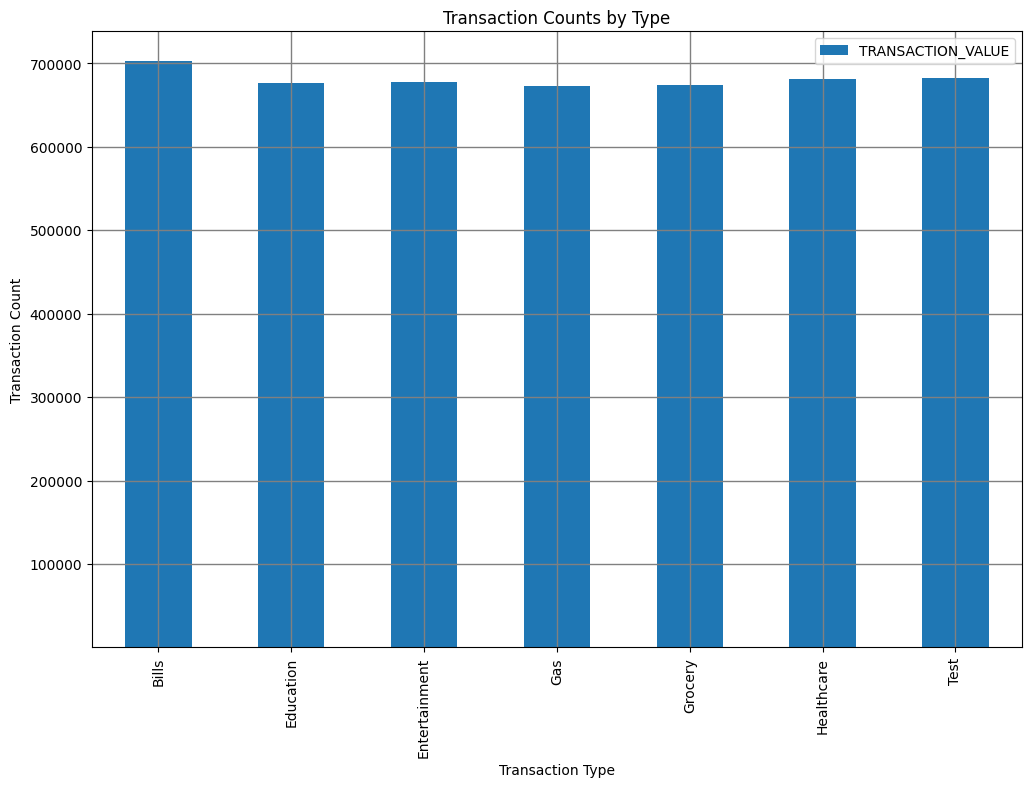

In [31]:
# 3.1 - Find and plot which transaction type has a high rate of transactions.

import pandas as pd
import matplotlib.pyplot as plt

df_transaction = pd_credVisual[['TRANSACTION_TYPE', 'TRANSACTION_VALUE']].groupby(pd_credVisual['TRANSACTION_TYPE']).sum()
df_transaction.reset_index(inplace=True)
df_transaction.head()

df_transaction .plot(kind='bar', x='TRANSACTION_TYPE', y='TRANSACTION_VALUE', figsize = (12,8))
plt.title('Transaction Counts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.grid(True, linewidth= 1, linestyle="-", color= 'grey')
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000, 700000])
plt.show()

C:\Spark\python\pyspark\sql\pandas\conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


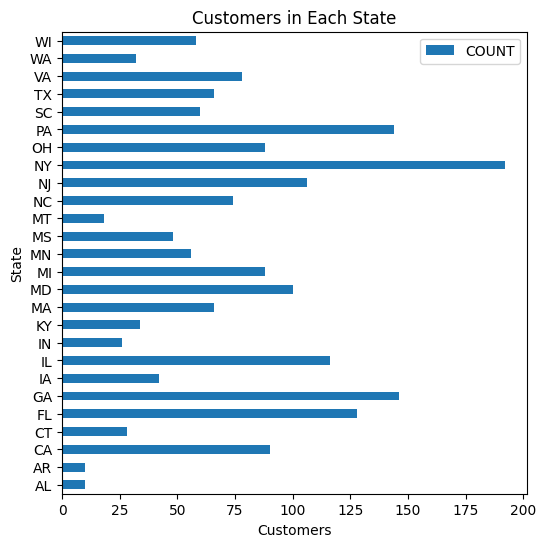

In [44]:
# 3.2 - Find and plot which state has a high number of customers.

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the database

sp_custVisual = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "cdw_sapp_customer") \
  .option("user", "root") \
  .option("password", "password") \
  .load()

# show dataframe
# sp_custVisual.show(1)

# Convert Spark dataframe to Pandas Dataframe
pd_custVisual = sp_custVisual.toPandas()

# Display last 5 rows in pandas dataframe
pd_credVisual.tail()

df_customers = pd_custVisual[['CUST_STATE']].groupby(pd_custVisual['CUST_STATE']).count()
df_customers.rename(columns = {'CUST_STATE':'COUNT'}, inplace = True)

df_customers.reset_index(inplace=True)
df_customers

df_customers.plot(kind='barh', x='CUST_STATE', y='COUNT', figsize=(6,6))
plt.title('Customers in Each State')
plt.xlabel('Customers')
plt.ylabel('State')
plt.show()


+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|BRANCH_CODE|      CUST_CC_NO| CUST_SSN|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|  TIMEID|
+-----------+----------------+---------+--------------+----------------+-----------------+--------+
|        156|4210653312478046|123455692|         22562|         Grocery|            91.08|20180813|
+-----------+----------------+---------+--------------+----------------+-----------------+--------+
only showing top 1 row

    CUST_SSN  TRANSACTION_VALUE
0  123451125           11266.14
1  123452783           11096.28
2  123453486           10952.16
3  123458668           10629.94
4  123456678           10522.06


C:\Users\Learner_XZHCG217\AppData\Local\Temp\ipykernel_4480\1514179499.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cc1 = pd_credVisual[['CUST_SSN', 'TRANSACTION_VALUE']].groupby(pd_credVisual['CUST_SSN']).sum()


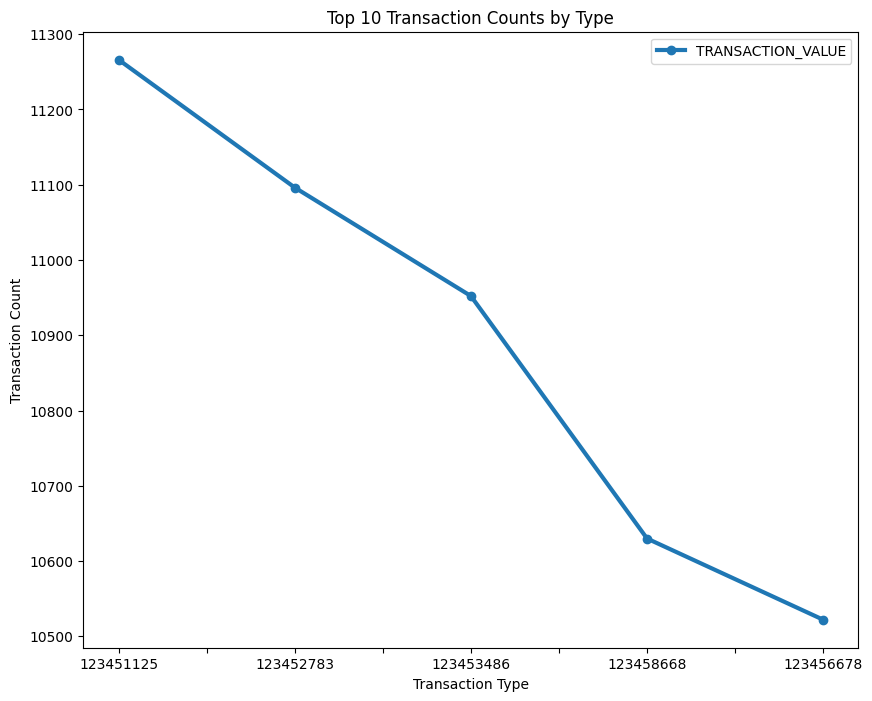

In [45]:
# 3.3 - Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
# hint(use CUST_SSN).

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the database

sp_credVisual = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "cdw_sapp_credit_card") \
  .option("user", "root") \
  .option("password", "password") \
  .load()

sp_credVisual.show(1)

# Convert Spark dataframe to Pandas Dataframe
pd_credVisual = sp_credVisual.toPandas()

# Display last 5 rows in pandas dataframe
pd_credVisual.tail()

pd_credVisual['CUST_SSN'] = pd_credVisual['CUST_SSN'].astype('string')
pd_credVisual.dtypes

df_cc1 = pd_credVisual[['CUST_SSN', 'TRANSACTION_VALUE']].groupby(pd_credVisual['CUST_SSN']).sum()
df_cc1 = df_cc1.sort_values(by=['TRANSACTION_VALUE'], ascending=False).head(5)

df_cc1.reset_index(inplace=True)
print(df_cc1)

df_cc1.plot(kind='line', x='CUST_SSN', y='TRANSACTION_VALUE', marker='o',linewidth=3, figsize=(10,8))
plt.title('Top 10 Transaction Counts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()